In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter('ignore',FutureWarning)

https://github.com/ifct2017/compositions/blob/master/assets/07-8.txt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IFCT/index.csv')

In [ ]:
data.head()

,Food Code; code,Food Name; name,Scientific Name; scie,Local Name; lang,Food Group; grup,No. of Regions; regn,Tags; tags,Energy; enerc,Energy; enerc_e,Moisture; water,...,Stigmasterol; stgstr,Stigmasterol; stgstr_e,β-Sitosterol; stostrb,β-Sitosterol; stostrb_e,Carotenes; carot,Carotenes; carot_e,Xanthophylls; xantp,Xanthophylls; xantp_e,β-Carotene equivalents; cartbeq,β-Carotene equivalents; cartbeq_e
0,A001,"Amaranth seed, black",Amaranthus cruentus,A. Moricha guti; H. Ramdana; Kan. Danthu beeja...,Cereals and Millets,1,vegetarian eggetarian fishetarian veg,1490,0,9.89,...,0.00824,0.00000,0.06136,0.00000,0.000000,0.000000,0.000010,0.000000,0.000000,0.000000
1,A002,"Amaranth seed, pale brown",Amaranthus cruentus,A. Moricha guti; G. Rajagaro; H. Ramdana; Kan....,Cereals and Millets,6,vegetarian eggetarian fishetarian veg,1489,10,9.20,...,0.00851,0.00037,0.06015,0.00149,0.000000,0.000000,0.000004,0.000001,0.000000,0.000000
2,A003,Bajra,Pennisetum typhoideum,"A., Kash. Baajra; B. Bajra; E. Pearl millet; G...",Cereals and Millets,6,vegetarian eggetarian fishetarian veg,1456,18,8.97,...,0.00497,0.00025,0.07587,0.00225,0.000028,0.000009,0.000039,0.000010,0.000028,0.000009
3,A004,Barley,Hordeum vulgare,A. Barli; B. Barley; G. Jav; H. Jau; Kan. Barl...,Cereals and Millets,6,vegetarian eggetarian fishetarian veg,1321,19,9.77,...,0.00117,0.00010,0.04283,0.00084,0.000000,0.000000,0.000007,0.000003,0.000000,0.000000
4,A005,Jowar,Sorghum vulgare,A. Jowar; B. Jowar; E. Sorghum; G. Jowar; H. J...,Cereals and Millets,6,vegetarian eggetarian fishetarian veg,1398,13,9.01,...,0.00531,0.00018,0.03827,0.00104,0.000008,0.000001,0.000017,0.000004,0.000008,0.000001


In [ ]:
data.columns

Index(['Food Code; code', 'Food Name; name', 'Scientific Name; scie',
       'Local Name; lang', 'Food Group; grup', 'No. of Regions; regn',
       'Tags; tags', 'Energy; enerc', 'Energy; enerc_e', 'Moisture; water',
       ...
       'Stigmasterol; stgstr', 'Stigmasterol; stgstr_e',
       'β-Sitosterol; stostrb', 'β-Sitosterol; stostrb_e', 'Carotenes; carot',
       'Carotenes; carot_e', 'Xanthophylls; xantp', 'Xanthophylls; xantp_e',
       'β-Carotene equivalents; cartbeq', 'β-Carotene equivalents; cartbeq_e'],
      dtype='object', length=421)

# Cleaning Data
___

In [ ]:
data.shape

(542, 421)

As we Are looking for all the major nutrients of the food,
We will Select Major Nutrients data;
The major columns were:

*	Food Name
*	Scientific Name
*	Food Group
*	Tags
*	Energy
*	Moisture
*	Vitamins
*	Total Fat
* Saturated Fatty acids
*	Cholesterol
*	Dietary Fiber
*	Carbohydrate
*	Protein
* Sodium
* Free Sugar
*	Ascorbic acids (C)

The Column Index No. were Identified using Excel.

In [ ]:
data = data.iloc[:,[1,2,4,6,7,9,13,15,66,17,19,21,23,57,100,199]]

In [ ]:
data.head()

,Food Name; name,Scientific Name; scie,Food Group; grup,Tags; tags,Energy; enerc,Moisture; water,Vitamins; vit,Total Fat; fatce,Saturated Fatty acids; fasat_e,Cholesterol; cholc,Dietary Fiber; fibtg,Carbohydrate; choavldf,Protein; protcnt,Ascorbic acids (C); vitc,Free Sugars; fsugar_e,Sodium (Na); na
0,"Amaranth seed, black",Amaranthus cruentus,Cereals and Millets,vegetarian eggetarian fishetarian veg,1490,9.89,0.001530,5.74,0.0000,0.0,7.02,59.98,14.59,0.0,0.00,0.00270
1,"Amaranth seed, pale brown",Amaranthus cruentus,Cereals and Millets,vegetarian eggetarian fishetarian veg,1489,9.20,0.001443,5.56,0.0705,0.0,7.47,61.46,13.27,0.0,0.07,0.00281
2,Bajra,Pennisetum typhoideum,Cereals and Millets,vegetarian eggetarian fishetarian veg,1456,8.97,0.002393,5.43,0.0345,0.0,11.49,61.78,10.96,0.0,0.01,0.00411
3,Barley,Hordeum vulgare,Cereals and Millets,vegetarian eggetarian fishetarian veg,1321,9.77,0.003876,1.30,0.0119,0.0,15.64,61.29,10.94,0.0,0.02,0.00756
4,Jowar,Sorghum vulgare,Cereals and Millets,vegetarian eggetarian fishetarian veg,1398,9.01,0.003296,1.73,0.0062,0.0,10.22,67.68,9.97,0.0,0.05,0.00542


In [ ]:
data.shape

(542, 16)

### Cleaning Column Name
---  

In [ ]:
data.columns = data.columns.str.split(';').str[0]

In [ ]:
data.head(3)

,Food Name,Scientific Name,Food Group,Tags,Energy,Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Ascorbic acids (C),Free Sugars,Sodium (Na)
0,"Amaranth seed, black",Amaranthus cruentus,Cereals and Millets,vegetarian eggetarian fishetarian veg,1490,9.89,0.001530,5.74,0.0000,0.0,7.02,59.98,14.59,0.0,0.00,0.00270
1,"Amaranth seed, pale brown",Amaranthus cruentus,Cereals and Millets,vegetarian eggetarian fishetarian veg,1489,9.20,0.001443,5.56,0.0705,0.0,7.47,61.46,13.27,0.0,0.07,0.00281
2,Bajra,Pennisetum typhoideum,Cereals and Millets,vegetarian eggetarian fishetarian veg,1456,8.97,0.002393,5.43,0.0345,0.0,11.49,61.78,10.96,0.0,0.01,0.00411


In [ ]:
data= data.rename(columns={'Tags':'Food Type','Ascorbic acids (C)':'Vitamin C','Energy':'Energy (Calories)'})

In [ ]:
data.head(3)

,Food Name,Scientific Name,Food Group,Food Type,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na)
0,"Amaranth seed, black",Amaranthus cruentus,Cereals and Millets,vegetarian eggetarian fishetarian veg,1490,9.89,0.001530,5.74,0.0000,0.0,7.02,59.98,14.59,0.0,0.00,0.00270
1,"Amaranth seed, pale brown",Amaranthus cruentus,Cereals and Millets,vegetarian eggetarian fishetarian veg,1489,9.20,0.001443,5.56,0.0705,0.0,7.47,61.46,13.27,0.0,0.07,0.00281
2,Bajra,Pennisetum typhoideum,Cereals and Millets,vegetarian eggetarian fishetarian veg,1456,8.97,0.002393,5.43,0.0345,0.0,11.49,61.78,10.96,0.0,0.01,0.00411


Units Of Measurement : All values are expressed per 100g edible portion
* Energy: kJ
* Vitamins: mg

### Simplifying the Data in food type
---

In [ ]:
data['Food Type'].value_counts()

vegetarian eggetarian fishetarian veg    328
fishetarian nonveg                       117
nonveg                                    82
eggetarian fishetarian nonveg             15
Name: Food Type, dtype: int64

In [ ]:
## Creating Dictionary for the food type
foodtype_dict ={"vegetarian eggetarian fishetarian veg": "Veg",
"fishetarian nonveg":"Non Veg",
"nonveg":"Non Veg",
"eggetarian fishetarian nonveg":"Non Veg"}

In [ ]:
data['Food Type']=data['Food Type'].replace(foodtype_dict)

In [ ]:
data['Food Type'].value_counts()

Veg        328
Non Veg    214
Name: Food Type, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Food Name              542 non-null    object 
 1   Scientific Name        425 non-null    object 
 2   Food Group             542 non-null    object 
 3   Food Type              542 non-null    object 
 4   Energy (Calories)      542 non-null    int64  
 5   Moisture               542 non-null    float64
 6   Vitamins               542 non-null    float64
 7   Total Fat              542 non-null    float64
 8   Saturated Fatty acids  542 non-null    float64
 9   Cholesterol            542 non-null    float64
 10  Dietary Fiber          542 non-null    float64
 11  Carbohydrate           542 non-null    float64
 12  Protein                542 non-null    float64
 13  Vitamin C              542 non-null    float64
 14  Free Sugars            542 non-null    float64
 15  Sodium

### Cleaning the Data in Food Name
---

In [ ]:
data[['Food Name','Food Description']]= data['Food Name'].str.split(',',1,expand=True)

In [ ]:
data.head(3)

,Food Name,Scientific Name,Food Group,Food Type,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na),Food Description
0,Amaranth seed,Amaranthus cruentus,Cereals and Millets,Veg,1490,9.89,0.001530,5.74,0.0000,0.0,7.02,59.98,14.59,0.0,0.00,0.00270,black
1,Amaranth seed,Amaranthus cruentus,Cereals and Millets,Veg,1489,9.20,0.001443,5.56,0.0705,0.0,7.47,61.46,13.27,0.0,0.07,0.00281,pale brown
2,Bajra,Pennisetum typhoideum,Cereals and Millets,Veg,1456,8.97,0.002393,5.43,0.0345,0.0,11.49,61.78,10.96,0.0,0.01,0.00411,None


In [ ]:
# Changing the position of new column(Food Description)
data.columns

Index(['Food Name', 'Scientific Name', 'Food Group', 'Food Type',
       'Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat',
       'Saturated Fatty acids', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate',
       'Protein', 'Vitamin C', 'Free Sugars', 'Sodium (Na)',
       'Food Description'],
      dtype='object')

In [ ]:
data= data[['Food Name','Food Description', 'Scientific Name', 'Food Group', 'Food Type',
       'Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat','Saturated Fatty acids', 'Cholesterol',
       'Dietary Fiber', 'Carbohydrate', 'Protein', 'Vitamin C','Free Sugars', 'Sodium (Na)']]

In [ ]:
data.head(3)

,Food Name,Food Description,Scientific Name,Food Group,Food Type,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na)
0,Amaranth seed,black,Amaranthus cruentus,Cereals and Millets,Veg,1490,9.89,0.001530,5.74,0.0000,0.0,7.02,59.98,14.59,0.0,0.00,0.00270
1,Amaranth seed,pale brown,Amaranthus cruentus,Cereals and Millets,Veg,1489,9.20,0.001443,5.56,0.0705,0.0,7.47,61.46,13.27,0.0,0.07,0.00281
2,Bajra,None,Pennisetum typhoideum,Cereals and Millets,Veg,1456,8.97,0.002393,5.43,0.0345,0.0,11.49,61.78,10.96,0.0,0.01,0.00411


### Simplifying the Data in Food Group
---

In [ ]:
data['Food Group'].value_counts()

Marine Fish                       92
Other Vegetables                  78
Fruits                            68
Animal Meat                       63
Green Leafy Vegetables            34
Condiments and Spices             33
Grain Legumes                     25
Cereals and Millets               24
Nuts and Oil Seeds                21
Roots and Tubers                  19
Poultry                           19
Egg and Egg Products              15
Edible Oils and Fats              14
Fresh Water Fish and Shellfish    10
Marine Shellfish                   8
Marine Mollusks                    7
Milk and Milk Products             4
Mushrooms                          4
Sugars                             2
Miscellaneous Foods                2
Name: Food Group, dtype: int64

In [ ]:
data[data['Food Group']=='Cereals and Millets']


,Food Name,Food Description,Scientific Name,Food Group,Food Type,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na)
0,Amaranth seed,black,Amaranthus cruentus,Cereals and Millets,Veg,1490,9.89,0.001530,5.74,0.00000,0.0,7.02,59.98,14.59,0.00000,0.00,0.00270
1,Amaranth seed,pale brown,Amaranthus cruentus,Cereals and Millets,Veg,1489,9.20,0.001443,5.56,0.07050,0.0,7.47,61.46,13.27,0.00000,0.07,0.00281
2,Bajra,None,Pennisetum typhoideum,Cereals and Millets,Veg,1456,8.97,0.002393,5.43,0.03450,0.0,11.49,61.78,10.96,0.00000,0.01,0.00411
3,Barley,None,Hordeum vulgare,Cereals and Millets,Veg,1321,9.77,0.003876,1.30,0.01190,0.0,15.64,61.29,10.94,0.00000,0.02,0.00756
4,Jowar,None,Sorghum vulgare,Cereals and Millets,Veg,1398,9.01,0.003296,1.73,0.00620,0.0,10.22,67.68,9.97,0.00000,0.05,0.00542
5,Maize,dry,Zea mays,Cereals and Millets,Veg,1398,9.26,0.004508,3.77,0.00560,0.0,12.24,64.77,8.80,0.00000,0.04,0.00444
6,Maize,"tender, local",Zea mays,Cereals and Millets,Veg,502,68.29,0.006753,1.40,0.00440,0.0,3.67,22.69,3.57,0.00426,0.05,0.00224
7,Maize,"tender, sweet",Zea mays,Cereals and Millets,Veg,405,74.40,0.008086,1.35,0.00290,0.0,3.30,16.42,4.16,0.00572,0.05,0.00223
8,Quinoa,None,Chenopodium quinoa,Cereals and Millets,Veg,1374,10.43,0.005841,5.50,0.00000,0.0,14.66,53.65,13.11,0.00000,0.00,0.00450
9,Ragi,None,Eleusine coracana,Cereals and Millets,Veg,1342,10.89,0.002462,1.92,0.01700,0.0,11.18,66.82,7.16,0.00000,0.06,0.00475


In [ ]:
data[data['Food Group']=='Cereals and Millets'].iloc[:,0]

0     Amaranth seed
1     Amaranth seed
2             Bajra
3            Barley
4             Jowar
5             Maize
6             Maize
7             Maize
8            Quinoa
9              Ragi
10      Rice flakes
11      Rice puffed
12             Rice
13             Rice
14             Rice
15            Samai
16           Varagu
17      Wheat flour
18      Wheat flour
19            Wheat
20            Wheat
21            Wheat
22            Wheat
23            Wheat
Name: Food Name, dtype: object

In [ ]:
millet_dict = ['Amaranth seed','Bajra','Barley','Jowar','Ragi','Samai','Varagu']
cereal_dict = ['Maize','Quinoa', 'Rice flakes','Rice puffed', 'Rice','Wheat flour','Wheat']


In [ ]:
data['Food Group'] = np.where(data['Food Name'].isin(millet_dict), 'Millets',
                            np.where(data['Food Name'].isin(cereal_dict), 'Cereal', data['Food Group']))


In [ ]:
data.head()

,Food Name,Food Description,Scientific Name,Food Group,Food Type,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na)
0,Amaranth seed,black,Amaranthus cruentus,Millets,Veg,1490,9.89,0.001530,5.74,0.0000,0.0,7.02,59.98,14.59,0.0,0.00,0.00270
1,Amaranth seed,pale brown,Amaranthus cruentus,Millets,Veg,1489,9.20,0.001443,5.56,0.0705,0.0,7.47,61.46,13.27,0.0,0.07,0.00281
2,Bajra,None,Pennisetum typhoideum,Millets,Veg,1456,8.97,0.002393,5.43,0.0345,0.0,11.49,61.78,10.96,0.0,0.01,0.00411
3,Barley,None,Hordeum vulgare,Millets,Veg,1321,9.77,0.003876,1.30,0.0119,0.0,15.64,61.29,10.94,0.0,0.02,0.00756
4,Jowar,None,Sorghum vulgare,Millets,Veg,1398,9.01,0.003296,1.73,0.0062,0.0,10.22,67.68,9.97,0.0,0.05,0.00542


In [ ]:
data['Food Name'].value_counts().to_frame().head(20)

,Food Name
Egg,15
Goat,13
Beef,11
Sheep,11
Pork,10
Chillies,9
Calf,9
Mango,8
Grapes,6
Wheat,5


In [ ]:
data['Food Group'].value_counts()

Marine Fish                       92
Other Vegetables                  78
Fruits                            68
Animal Meat                       63
Green Leafy Vegetables            34
Condiments and Spices             33
Grain Legumes                     25
Nuts and Oil Seeds                21
Roots and Tubers                  19
Poultry                           19
Cereal                            16
Egg and Egg Products              15
Edible Oils and Fats              14
Fresh Water Fish and Shellfish    10
Marine Shellfish                   8
Millets                            8
Marine Mollusks                    7
Milk and Milk Products             4
Mushrooms                          4
Miscellaneous Foods                2
Sugars                             2
Name: Food Group, dtype: int64

## Summary Statistics

In [ ]:
data.describe()

,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na)
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,531.675277,66.378210,0.045442,6.820830,0.077401,0.057158,3.881236,10.822177,10.685314,0.012678,0.083967,0.038507
std,515.110632,29.567544,0.060982,17.605904,0.277406,0.173295,6.519471,19.050177,8.817749,0.029675,0.279891,0.061640
min,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,167.250000,68.400000,0.004774,0.370000,0.000000,0.000000,0.000000,0.000000,1.490000,0.000000,0.000000,0.003370
50%,384.000000,77.240000,0.012980,1.065000,0.002075,0.000000,1.860000,2.695000,10.365000,0.000000,0.000000,0.018615
75%,633.000000,85.547500,0.072159,4.430000,0.011540,0.044605,4.425000,11.397500,19.687500,0.011440,0.060000,0.050772
max,2809.000000,95.770000,0.321409,100.010000,4.130000,1.668000,47.550000,84.870000,37.800000,0.252000,3.220000,0.849000


In [ ]:
Energy_data = data.groupby(by='Food Group')['Energy (Calories)'].describe()
Energy_data

,count,mean,std,min,25%,50%,75%,max
Food Group,,,,,,,,
Animal Meat,63.0,541.492063,162.317975,298.0,417.00,503.0,624.00,1006.0
Cereal,16.0,1307.187500,337.787156,405.0,1367.25,1410.5,1474.00,1514.0
Condiments and Spices,33.0,690.393939,552.657666,130.0,180.00,518.0,1125.00,1940.0
Edible Oils and Fats,14.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Egg and Egg Products,15.0,716.066667,293.781373,187.0,626.50,710.0,785.50,1290.0
Fresh Water Fish and Shellfish,10.0,432.700000,163.559741,284.0,340.25,395.0,445.25,852.0
Fruits,68.0,348.602941,333.442252,70.0,177.25,235.0,341.25,1340.0
Grain Legumes,25.0,1297.440000,113.408583,1146.0,1229.00,1265.0,1356.00,1596.0
Green Leafy Vegetables,34.0,153.882353,65.743194,67.0,103.75,142.0,184.50,305.0


In [ ]:
Energy_data = data.groupby(by='Food Group')[['Energy (Calories)','Saturated Fatty acids','Free Sugars','Sodium (Na)']].describe()
Energy_data .describe()

Energy (Calories)                                                     \
                  count         mean         std          min          25%   
count         21.000000    21.000000   21.000000    21.000000    21.000000   
mean          25.809524   629.495783  237.850330   329.047619   501.369048   
std           26.626339   526.071207  221.899318   369.805419   516.726279   
min            2.000000     0.000000    0.000000     0.000000     0.000000   
25%            8.000000   284.750000   65.743194    89.000000   144.000000   
50%           16.000000   437.695652  162.317975   242.000000   340.250000   
75%           33.000000   788.750000  337.787156   305.000000   551.500000   
max           92.000000  2096.285714  875.398195  1321.000000  1863.000000   

                                             Saturated Fatty acids             \
               50%          75%          max                 count       mean   
count    21.000000    21.000000    21.000000             21.000000  21.000000   
mean    606.023810   734.011905  1069.333333             25.809524   0.085122   
std     549.063259   609.057209   688.129300             26.626339   0.183806   
min       0.000000     0.000000     0.000000              2.000000   0.000000   
25%     235.000000   334.500000   456.000000              8.000000   0.003011   
50%     411.500000   454.500000  1083.000000             16.000000   0.008889   
75%     764.000000  1139.750000  1490.000000             33.000000   0.036147   
max    2144.000000  2438.000000  2809.000000             92.000000   0.784286   

       ... Free Sugars            Sodium (Na)                        \
       ...         75%        max       count       mean        std   
count  ...   21.000000  21.000000   21.000000  21.000000  21.000000   
mean   ...    0.211905   0.553333   25.809524   0.049847   0.035598   
std    ...    0.564719   0.912263   26.626339   0.064806   0.058712   
min    ...    0.000000   0.000000    2.000000   0.000000   0.000000   
25%    ...    0.000000   0.000000    8.000000   0.008977   0.007176   
50%    ...    0.045000   0.110000   16.000000   0.022907   0.017126   
75%    ...    0.155000   0.720000   33.000000   0.056448   0.036266   
max    ...    2.615000   3.220000   92.000000   0.215591   0.255508   

                                                              
             min        25%        50%        75%        max  
count  21.000000  21.000000  21.000000  21.000000  21.000000  
mean    0.014969   0.030787   0.041655   0.057776   0.135064  
std     0.023513   0.042299   0.056507   0.079561   0.197272  
min     0.000000   0.000000   0.000000   0.000000   0.000000  
25%     0.001350   0.003970   0.008985   0.009530   0.025380  
50%     0.003970   0.010140   0.015510   0.024232   0.048100  
75%     0.019600   0.038405   0.056100   0.063643   0.183000  
max     0.099140   0.137500   0.189500   0.276000   0.849000  

[8 rows x 32 columns]

In [ ]:
# Edible Oils have no Calories Info. Deleteing Food Group(Edible Oils and Fats).

In [ ]:
data =data.drop(data[data['Food Group']=='Edible Oils and Fats'].index)

In [ ]:
data['Food Group'].value_counts()

Marine Fish                       92
Other Vegetables                  78
Fruits                            68
Animal Meat                       63
Green Leafy Vegetables            34
Condiments and Spices             33
Grain Legumes                     25
Nuts and Oil Seeds                21
Poultry                           19
Roots and Tubers                  19
Cereal                            16
Egg and Egg Products              15
Fresh Water Fish and Shellfish    10
Marine Shellfish                   8
Millets                            8
Marine Mollusks                    7
Milk and Milk Products             4
Mushrooms                          4
Miscellaneous Foods                2
Sugars                             2
Name: Food Group, dtype: int64

In [ ]:
data.columns

Index(['Food Name', 'Food Description', 'Scientific Name', 'Food Group',
       'Food Type', 'Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat',
       'Saturated Fatty acids', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate',
       'Protein', 'Vitamin C', 'Free Sugars', 'Sodium (Na)'],
      dtype='object')

### Food Groups:

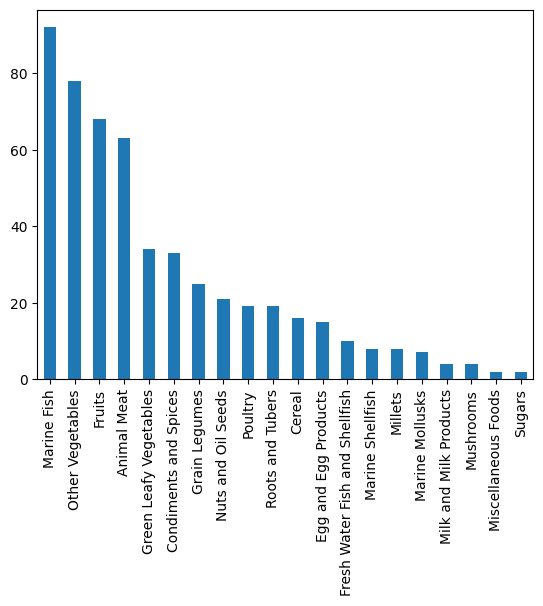

In [ ]:
food_groups = data['Food Group'].value_counts().plot(kind='bar')

In [ ]:
data['Food Group'].value_counts().count()

20

## Nutritional Summary

Text(0, 0.5, 'Average Content')

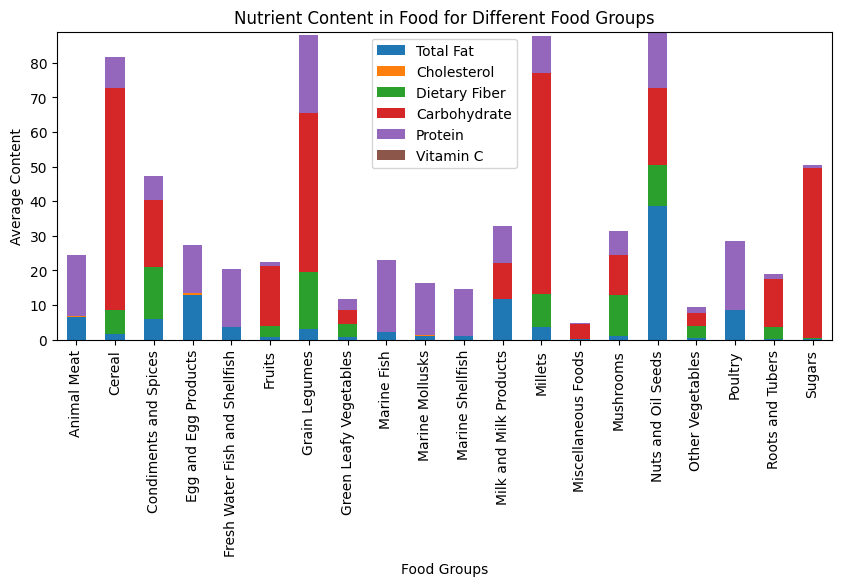

In [ ]:
food_nutrients = data[['Food Group', 'Total Fat', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate', 'Protein', 'Vitamin C']]

group_nutrient = food_nutrients.groupby('Food Group').mean()
group_nutrient.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Nutrient Content in Food for Different Food Groups')
plt.xlabel('Food Groups')
plt.ylabel('Average Content')

### Calories

Text(0.5, 1.0, 'Indian Food With Highest Calories/100 g')

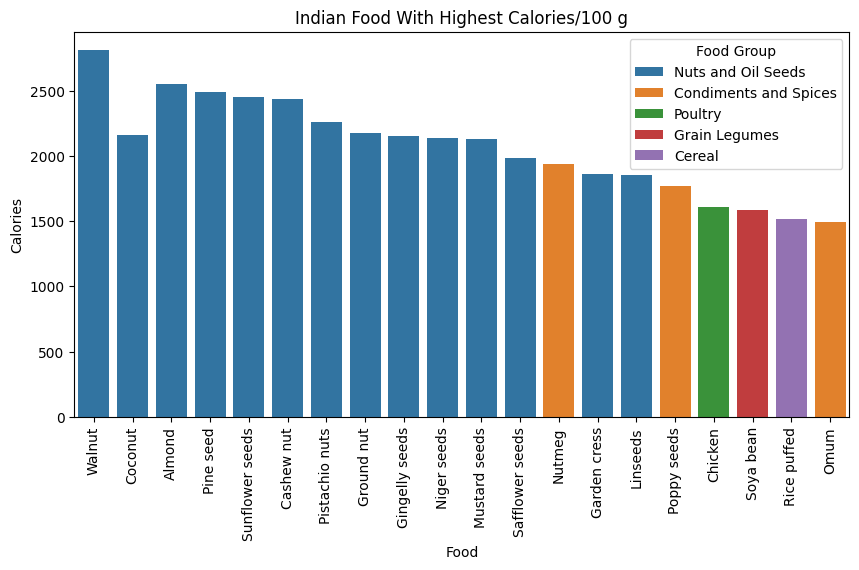

In [ ]:
top_10_calories = data[['Food Name', 'Scientific Name', 'Food Group', 'Food Type','Energy (Calories)']].sort_values(by='Energy (Calories)',ascending=False).head(25)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_calories,x='Food Name',y='Energy (Calories)',hue='Food Group',ci=None)
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Calories')
plt.title('Indian Food With Highest Calories/100 g')

In [ ]:
top_10_calories

,Food Name,Scientific Name,Food Group,Food Type,Energy (Calories)
301,Walnut,Juglans regia,Nuts and Oil Seeds,Veg,2809
286,Coconut,Cocos nucifera,Nuts and Oil Seeds,Veg,2611
281,Almond,Prunus amygdalus,Nuts and Oil Seeds,Veg,2549
297,Pine seed,Pinus gerardiana,Nuts and Oil Seeds,Veg,2486
300,Sunflower seeds,Helianthus annuus,Nuts and Oil Seeds,Veg,2453
285,Cashew nut,Anacardium occidentale,Nuts and Oil Seeds,Veg,2438
298,Pistachio nuts,Pistacla vera,Nuts and Oil Seeds,Veg,2257
292,Ground nut,Arachis hypogea,Nuts and Oil Seeds,Veg,2176
291,Gingelly seeds,Sesamum indicum,Nuts and Oil Seeds,Veg,2174
290,Gingelly seeds,Sesamum indicum,Nuts and Oil Seeds,Veg,2161


In [ ]:
top_10_water = data[['Food Name', 'Scientific Name', 'Food Group', 'Food Type','Moisture']].sort_values(by='Moisture',ascending=False)
top_10_water_group =top_10_water.groupby('Food Group')['Moisture'] .mean().sort_values(ascending=False).head(15)
top_10_water_group

Food Group
Miscellaneous Foods               94.815000
Other Vegetables                  89.797051
Green Leafy Vegetables            86.435882
Marine Shellfish                  81.022500
Marine Mollusks                   80.304286
Roots and Tubers                  79.845263
Fresh Water Fish and Shellfish    77.897000
Fruits                            76.646029
Marine Fish                       76.339348
Animal Meat                       74.446667
Egg and Egg Products              71.027333
Poultry                           70.296842
Mushrooms                         67.492500
Milk and Milk Products            65.447500
Condiments and Spices             49.364848
Name: Moisture, dtype: float64

In [ ]:
moisture_mean = top_10_water['Moisture'].mean()
moisture_mean

68.13823863636364

Text(0.5, 1.0, 'Top 10 Food Groups by Mean Moisture Content')

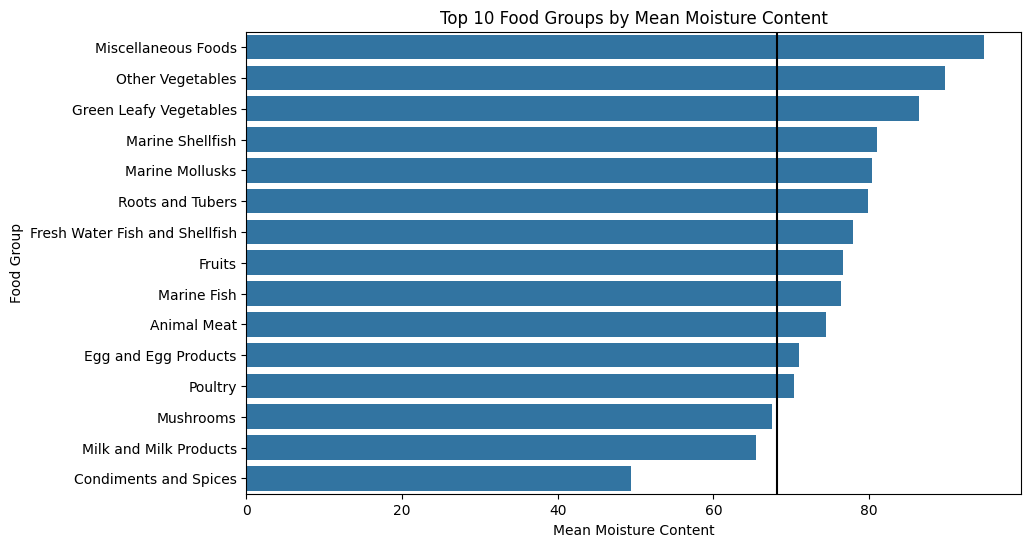

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_water_group.values, y=top_10_water_group.index) # using .values& . index as the data is series
plt.axvline(x=moisture_mean, color='black',linestyle='-')
plt.xlabel('Mean Moisture Content')
plt.ylabel('Food Group')
plt.title('Top 10 Food Groups by Mean Moisture Content')

In [ ]:
nutrients = [['Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat', 'Cholesterol',
       'Dietary Fiber', 'Carbohydrate', 'Protein', 'Vitamin C']]

In [ ]:
data

,Food Name,Food Description,Scientific Name,Food Group,Food Type,Energy (Calories),Moisture,Vitamins,Total Fat,Saturated Fatty acids,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C,Free Sugars,Sodium (Na)
0,Amaranth seed,black,Amaranthus cruentus,Millets,Veg,1490,9.89,0.001530,5.74,0.0000,0.00000,7.02,59.98,14.59,0.0,0.00,0.00270
1,Amaranth seed,pale brown,Amaranthus cruentus,Millets,Veg,1489,9.20,0.001443,5.56,0.0705,0.00000,7.47,61.46,13.27,0.0,0.07,0.00281
2,Bajra,None,Pennisetum typhoideum,Millets,Veg,1456,8.97,0.002393,5.43,0.0345,0.00000,11.49,61.78,10.96,0.0,0.01,0.00411
3,Barley,None,Hordeum vulgare,Millets,Veg,1321,9.77,0.003876,1.30,0.0119,0.00000,15.64,61.29,10.94,0.0,0.02,0.00756
4,Jowar,None,Sorghum vulgare,Millets,Veg,1398,9.01,0.003296,1.73,0.0062,0.00000,10.22,67.68,9.97,0.0,0.05,0.00542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,Rohu,None,Labeo rohita,Fresh Water Fish and Shellfish,Non Veg,428,76.34,0.247219,2.39,1.1130,0.04772,0.00,0.00,19.71,0.0,0.00,0.03556
524,Crab,None,Pachygrapsus sp.,Fresh Water Fish and Shellfish,Non Veg,327,80.58,0.211098,0.89,0.0000,0.05291,0.00,0.00,13.23,0.0,0.00,0.28000
525,Prawns,big,Macrobrachium rosenbergii,Fresh Water Fish and Shellfish,Non Veg,380,77.43,0.190901,0.52,0.0000,0.08728,0.00,0.00,19.24,0.0,0.00,0.84900
526,Prawns,small,Macrobrachium sp.,Fresh Water Fish and Shellfish,Non Veg,297,82.58,0.212381,0.78,0.0000,0.11200,0.00,0.00,13.07,0.0,0.00,0.07771


# Vitamin C:
___

In [ ]:
data['Food Group'].value_counts()

Marine Fish                       92
Other Vegetables                  78
Fruits                            68
Animal Meat                       63
Green Leafy Vegetables            34
Condiments and Spices             33
Grain Legumes                     25
Nuts and Oil Seeds                21
Poultry                           19
Roots and Tubers                  19
Cereal                            16
Egg and Egg Products              15
Fresh Water Fish and Shellfish    10
Marine Shellfish                   8
Millets                            8
Marine Mollusks                    7
Milk and Milk Products             4
Mushrooms                          4
Miscellaneous Foods                2
Sugars                             2
Name: Food Group, dtype: int64

In [ ]:
food_grp_vitc = data.groupby('Food Group')['Vitamin C'].mean().sort_values(ascending=False).head(10)
pd.DataFrame(food_grp_vitc)

,Vitamin C
Food Group,
Green Leafy Vegetables,0.056769
Fruits,0.034296
Condiments and Spices,0.027008
Other Vegetables,0.017931
Roots and Tubers,0.015400
Sugars,0.003365
Milk and Milk Products,0.001095
Miscellaneous Foods,0.000780
Cereal,0.000624


*Vitamin C by Food Group*

Text(0.5, 1.0, 'Vitamin C Content of Different Food Groups')

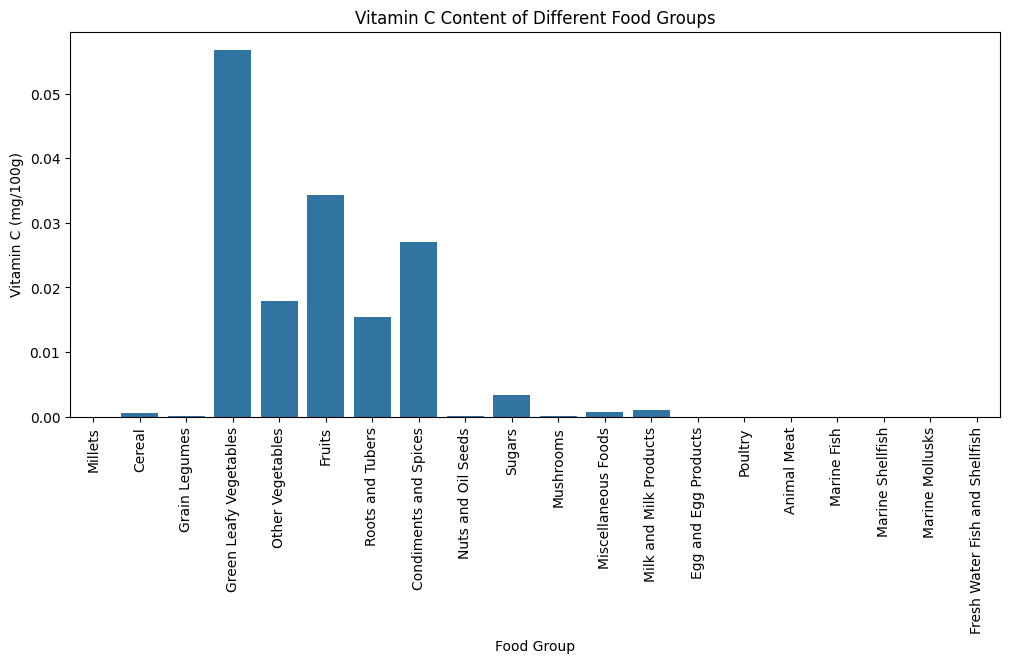

In [ ]:
plt.figure(figsize=(12, 5))
vit_c = sns.barplot(data=data,x='Food Group',y='Vitamin C',ci=None)
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.ylabel('Vitamin C (mg/100g)')
plt.title('Vitamin C Content of Different Food Groups')


_top 20 food with highest vitamin C_

In [ ]:
vit_c_top20 = data[['Food Name','Food Description','Food Group','Vitamin C']]
vit_c_top20 = vit_c_top20.nlargest(20, 'Vitamin C')
vit_c_top20

,Food Name,Food Description,Food Group,Vitamin C
181,Goosberry,None,Fruits,0.25200
189,Guava,pink flesh,Fruits,0.22200
188,Guava,white flesh,Fruits,0.21400
175,Currants,black,Fruits,0.18200
192,Karonda fruit,None,Fruits,0.13500
76,Parsley,None,Green Leafy Vegetables,0.13300
117,Capsicum,yellow,Other Vegetables,0.12700
115,Capsicum,green,Other Vegetables,0.12300
49,Agathi leaves,None,Green Leafy Vegetables,0.12100
116,Capsicum,red,Other Vegetables,0.11200


In [ ]:
vit_c_top20_viz = px.treemap(vit_c_top20,path=['Food Name'],values='Vitamin C',title='Food With Highest Vitamin C Content',width=800)
vit_c_top20_viz

_Top food with highest vit C content within each Food Group_

In [ ]:
fig = px.treemap(data, path=['Food Group', 'Food Name'], values='Vitamin C')
fig.show()

# Energy
___

In [ ]:
data.columns

Index(['Food Name', 'Food Description', 'Scientific Name', 'Food Group',
       'Food Type', 'Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat',
       'Saturated Fatty acids', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate',
       'Protein', 'Vitamin C', 'Free Sugars', 'Sodium (Na)'],
      dtype='object')

Text(0.5, 1.0, 'Average Energy (Calories) in food')

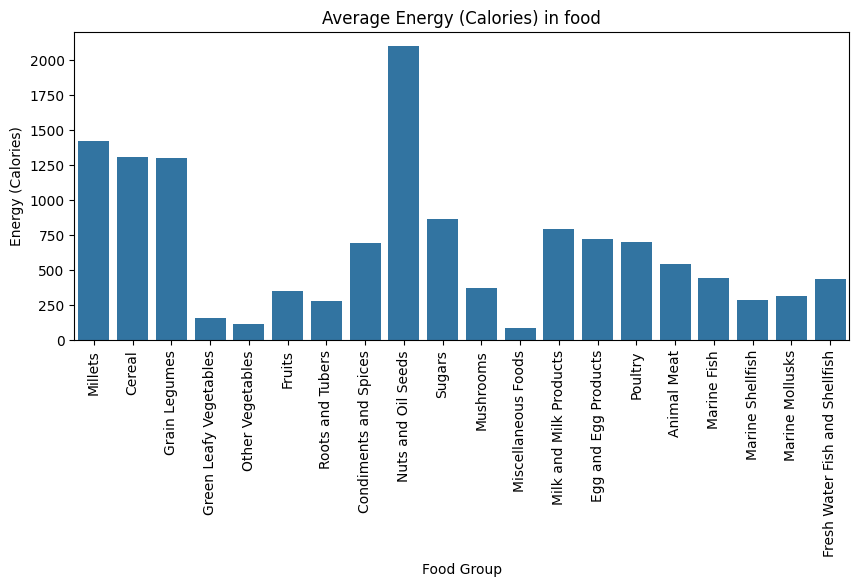

In [ ]:
plt.figure(figsize=(10, 4))
vit_c = sns.barplot(data=data,x='Food Group',y='Energy (Calories)',ci=None)
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.ylabel('Energy (Calories)')
plt.title('Average Energy (Calories) in food')

Text(0.5, 1.0, 'Moisture Content in food')

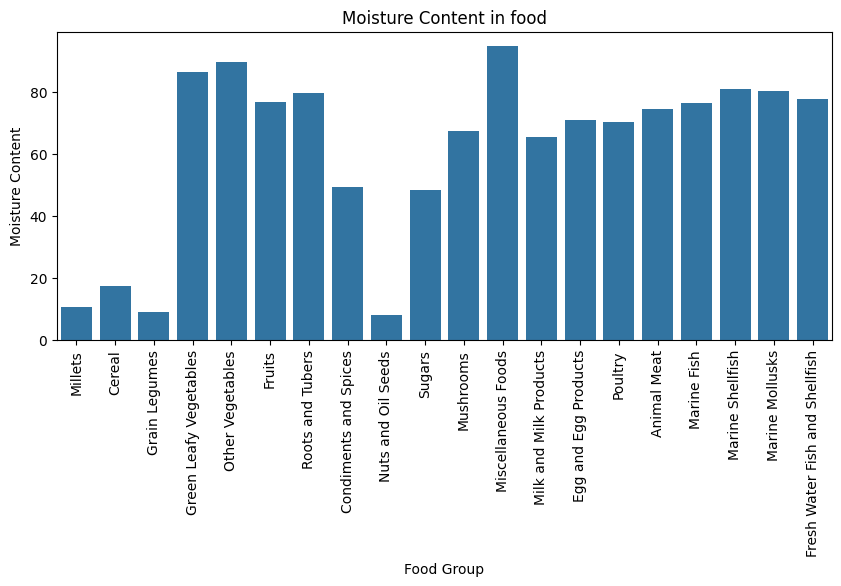

In [ ]:
plt.figure(figsize=(10, 4))
vit_c = sns.barplot(data=data,x='Food Group',y='Moisture',ci=None)
plt.xlabel('Food Group')
plt.xticks(rotation=90)
plt.ylabel('Moisture Content')
plt.title('Moisture Content in food')

In [ ]:
energy_water = data[['Energy (Calories)','Moisture']]
energy_water.describe()

,Energy (Calories),Moisture
count,528.000000,528.000000
mean,545.772727,68.138239
std,514.469836,27.880306
min,46.000000,3.300000
25%,179.750000,69.315000
50%,388.000000,77.590000
75%,639.500000,85.575000
max,2809.000000,95.770000


<Axes: title={'center': 'Relationship between Energy (Calories) and Moisture Content'}, xlabel='Moisture', ylabel='Energy (Calories)'>

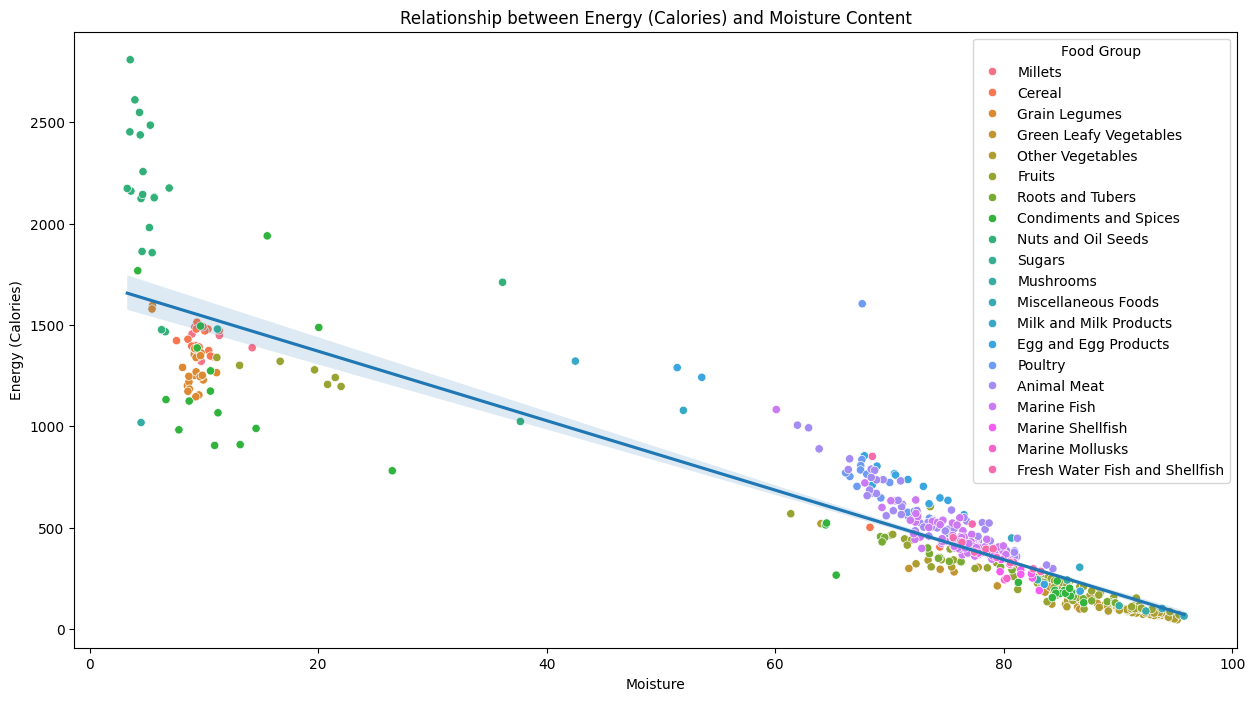

In [ ]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(15,8))
water = sns.scatterplot(x="Moisture", y="Energy (Calories)", data=data, hue="Food Group")
water.set_title("Relationship between Energy (Calories) and Moisture Content")
water.set_xlabel("Moisture Content")
water.set_ylabel("Energy (Calories)")
sns.regplot(x="Moisture", y="Energy (Calories)", data=data, scatter=False)

<Axes: title={'center': 'Relationship between Energy (Calories) and Protein Content'}, xlabel='Energy (Calories)', ylabel='Protein'>

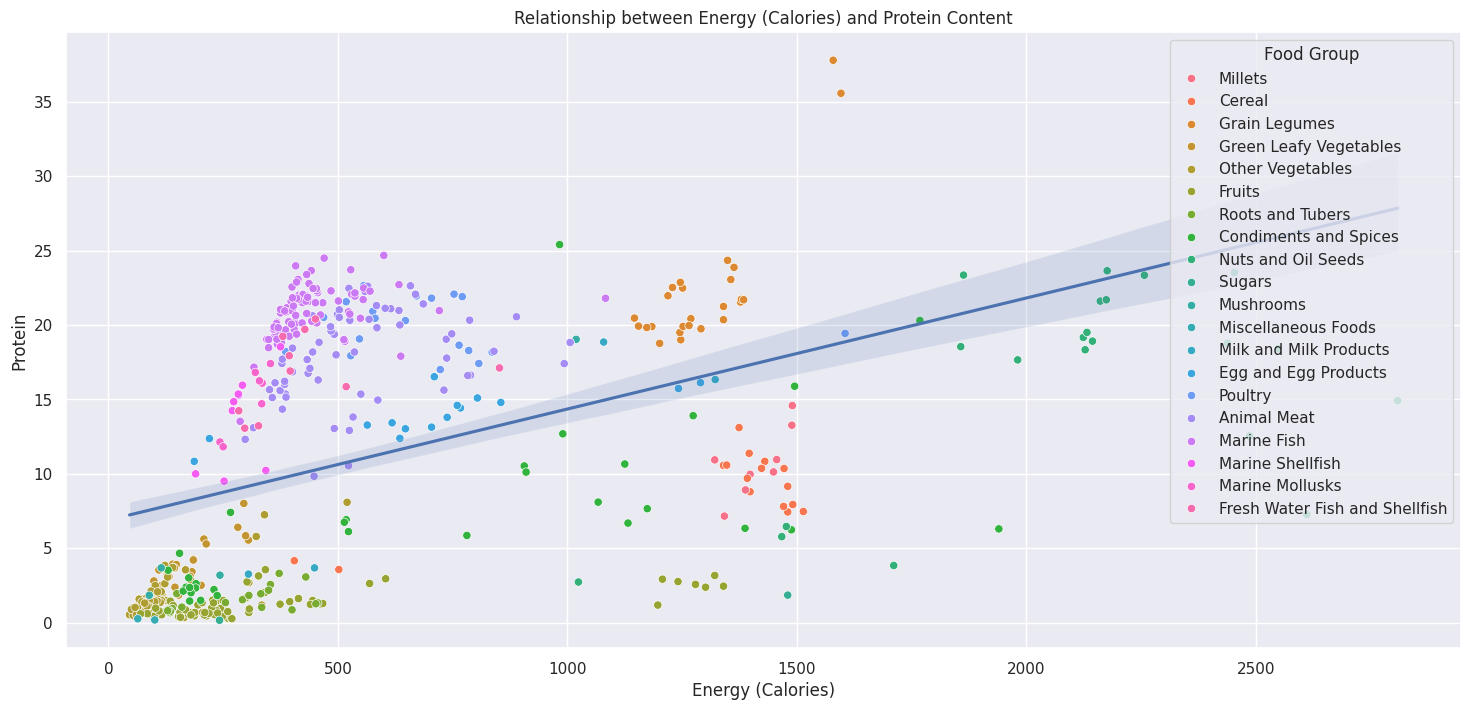

In [ ]:
# Scatter plot to visualize the relationship between Energy And Protein Content.
sns.set_theme(style="darkgrid")
plt.figure(figsize=(18,8))
water = sns.scatterplot(x="Energy (Calories)", y="Protein", data=data,hue="Food Group")
water.legend(title='Food Group')
water.set_title("Relationship between Energy (Calories) and Protein Content")
water.set_xlabel("Energy")
water.set_ylabel("Protein")

sns.regplot(x="Energy (Calories)", y="Protein", data=data, scatter=False)


In [ ]:
data.columns

Index(['Food Name', 'Food Description', 'Scientific Name', 'Food Group',
       'Food Type', 'Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat',
       'Saturated Fatty acids', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate',
       'Protein', 'Vitamin C', 'Free Sugars', 'Sodium (Na)'],
      dtype='object')

In [ ]:
group_nutrient

,Total Fat,Cholesterol,Dietary Fiber,Carbohydrate,Protein,Vitamin C
Food Group,,,,,,
Animal Meat,6.445079,0.249002,0.000000,0.000000,17.824603,0.000000
Cereal,1.498750,0.000000,7.098750,64.038750,8.954375,0.000624
Condiments and Spices,5.883636,0.000000,15.216970,19.357879,6.914848,0.027008
Egg and Egg Products,12.934000,0.563200,0.000000,0.000000,13.974000,0.000000
Fresh Water Fish and Shellfish,3.597000,0.065274,0.000000,0.000000,16.773000,0.000000
Fruits,0.670588,0.000000,3.268971,17.334118,1.185882,0.034296
Grain Legumes,3.022800,0.000000,16.631200,45.909200,22.344000,0.000044
Green Leafy Vegetables,0.629412,0.000000,3.941765,3.892059,3.284118,0.056769
Marine Fish,2.232065,0.035960,0.000000,0.000000,20.868261,0.000000


In [ ]:
data.columns

Index(['Food Name', 'Food Description', 'Scientific Name', 'Food Group',
       'Food Type', 'Energy (Calories)', 'Moisture', 'Vitamins', 'Total Fat',
       'Saturated Fatty acids', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate',
       'Protein', 'Vitamin C', 'Free Sugars', 'Sodium (Na)'],
      dtype='object')

Text(0, 0.5, 'Average Content')

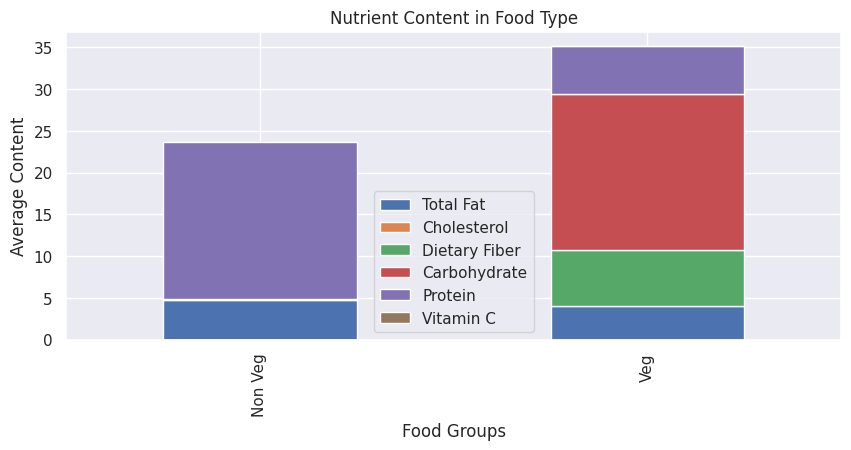

In [ ]:
type_cols = ['Food Group','Food Type', 'Total Fat', 'Cholesterol', 'Dietary Fiber', 'Carbohydrate', 'Protein', 'Vitamin C']
food_type = data[type_cols]

food_type_nutri = food_type.groupby('Food Type').mean()
food_type_nutri.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.title('Nutrient Content in Food Type')
plt.xlabel('Food Groups')
plt.ylabel('Average Content')